In [ ]:
import json
import matplotlib.pyplot as plt

nome_file = "meteorites.json"
with open(nome_file, "r", encoding="utf8") as file:
    dati_meteoriti = json.loads(file.read())


In [ ]:
print("numero dei meteoriti: ", len(dati_meteoriti))

numero dei meteoriti:  45716


In [ ]:
print(dati_meteoriti[0].keys())

dict_keys(['name', 'id', 'name_type', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'geolocation'])


In [ ]:
print(dati_meteoriti[0])
print(dati_meteoriti[1])
print(dati_meteoriti[2])
print(dati_meteoriti[3])
print(dati_meteoriti[4])

{'name': 'Aachen', 'id': 1, 'name_type': 'Valid', 'class': 'L5', 'mass': 21.0, 'fall': 'Fell', 'year': 1880.0, 'lat': 50.775, 'long': 6.08333, 'geolocation': '(50.775, 6.08333)'}
{'name': 'Aarhus', 'id': 2, 'name_type': 'Valid', 'class': 'H6', 'mass': 720.0, 'fall': 'Fell', 'year': 1951.0, 'lat': 56.18333, 'long': 10.23333, 'geolocation': '(56.18333, 10.23333)'}
{'name': 'Abee', 'id': 6, 'name_type': 'Valid', 'class': 'EH4', 'mass': 107000.0, 'fall': 'Fell', 'year': 1952.0, 'lat': 54.21667, 'long': -113.0, 'geolocation': '(54.21667, -113.0)'}
{'name': 'Acapulco', 'id': 10, 'name_type': 'Valid', 'class': 'Acapulcoite', 'mass': 1914.0, 'fall': 'Fell', 'year': 1976.0, 'lat': 16.88333, 'long': -99.9, 'geolocation': '(16.88333, -99.9)'}
{'name': 'Achiras', 'id': 370, 'name_type': 'Valid', 'class': 'L6', 'mass': 780.0, 'fall': 'Fell', 'year': 1902.0, 'lat': -33.16667, 'long': -64.95, 'geolocation': '(-33.16667, -64.95)'}


In [ ]:
import math

masse = [item.get('mass') for item in dati_meteoriti if item.get('mass') is not None]
anni = [item.get('year') for item in dati_meteoriti if item.get('year') is not None]

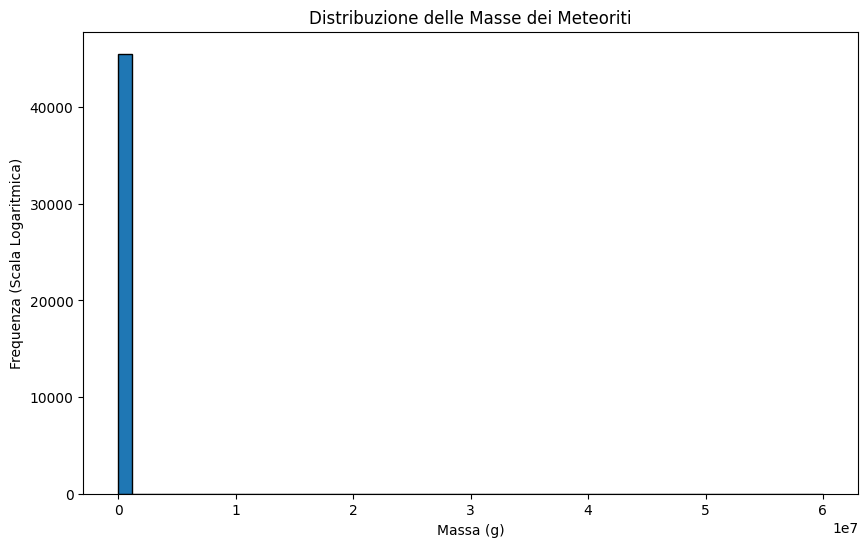

In [ ]:
plt.figure(figsize=(10, 6))
#senza scala logaritmica
plt.hist(masse, bins=50, edgecolor='black')
plt.xlabel("Massa (g)")
plt.ylabel("Frequenza (Scala Logaritmica)")
plt.title("Distribuzione delle Masse dei Meteoriti")
plt.show()

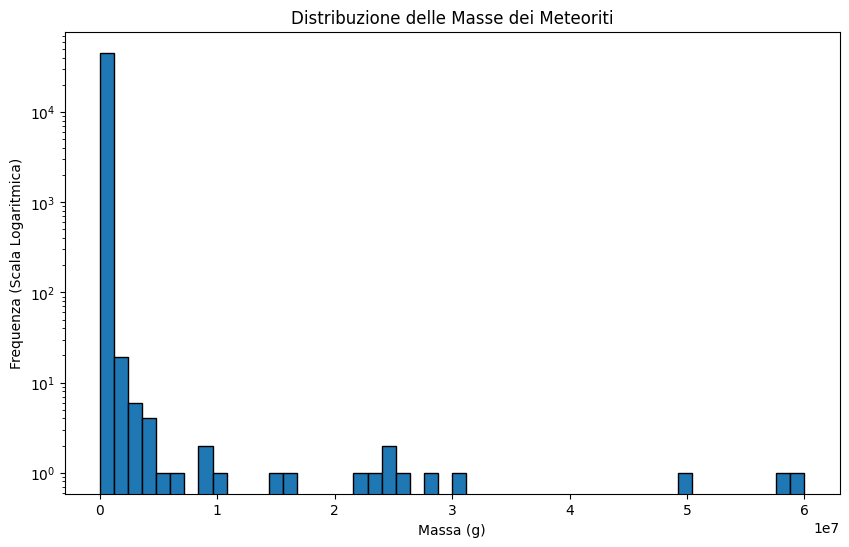

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# 50 colonne
plt.hist(masse, bins=50, edgecolor='black', log=True)
plt.xlabel("Massa (g)")
plt.ylabel("Frequenza (Scala Logaritmica)")
plt.title("Distribuzione delle Masse dei Meteoriti")
plt.show()

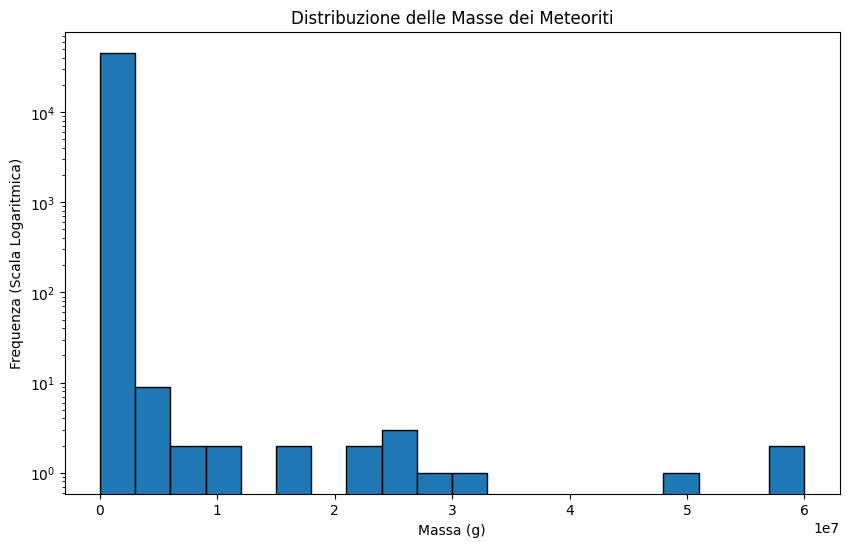

In [ ]:
plt.figure(figsize=(10, 6))
#20 colonne
plt.hist(masse, bins=20, edgecolor='black', log=True)
plt.xlabel("Massa (g)")
plt.ylabel("Frequenza (Scala Logaritmica)")
plt.title("Distribuzione delle Masse dei Meteoriti")
plt.show()

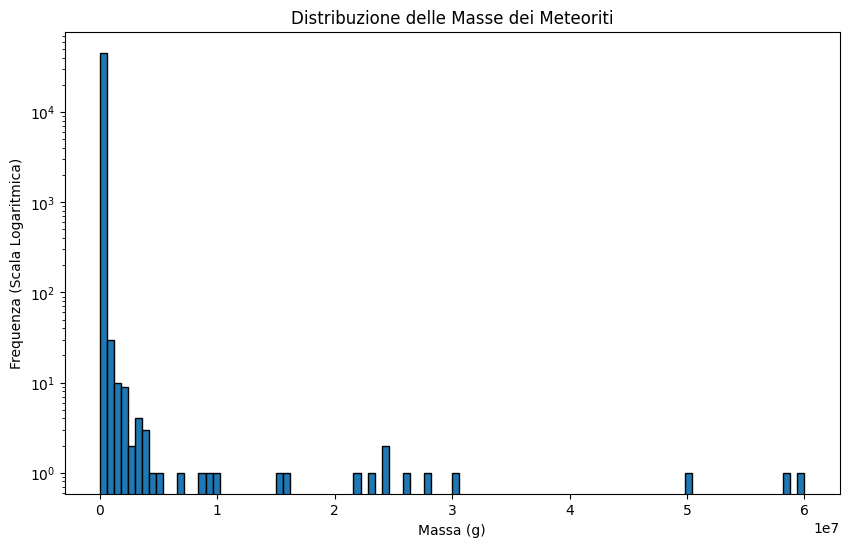

In [ ]:
plt.figure(figsize=(10, 6))
#100 colonne
plt.hist(masse, bins=100, edgecolor='black', log=True)
plt.xlabel("Massa (g)")
plt.ylabel("Frequenza (Scala Logaritmica)")
plt.title("Distribuzione delle Masse dei Meteoriti")
plt.show()

In [ ]:
import folium
import numpy as np
import pandas as pd

In [ ]:
df_meteoriti = pd.DataFrame(dati_meteoriti)
df_meteoriti['lat'] = pd.to_numeric(df_meteoriti['lat'], errors='coerce')
df_meteoriti['long'] = pd.to_numeric(df_meteoriti['long'], errors='coerce')
df_meteoriti_geoloc = df_meteoriti.dropna(subset=['lat', 'long'])
media_lat = np.nanmean(df_meteoriti_geoloc['lat'])
media_lon = np.nanmean(df_meteoriti_geoloc['long'])
mappa_meteoriti = folium.Map(location=[media_lat, media_lon], zoom_start=2)

In [ ]:
# Aggiungi un marker per ogni meteorite con coordinate valide
for index, row in df_meteoriti_geoloc.iterrows():
  lat = row['lat']
  lon = row['long']
  nome = row['name']
folium.Marker([lat, lon], popup=nome).add_to(mappa_meteoriti)


In [ ]:
mappa_meteoriti

In [ ]:
from folium.plugins import HeatMap
coordinate = [[row['lat'], row['long']] for index, row in df_meteoriti_geoloc.iterrows()]
mappa_calore = folium.Map(location=[media_lat, media_lon], zoom_start=2)
HeatMap(coordinate).add_to(mappa_calore)
mappa_calore